In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Step 2: Load the CSV file (Make sure the file is in the same directory or give the full path)
try:
    df = pd.read_csv("btc_15m_data_2018_to_2025.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print(" File not found. Please check the filename or path.")

# Step 3: Preview the data
print(" Preview of the dataset:")
print(df.head())

#  Step 4: Convert 'timestamp' to datetime if it exists
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')
    df.set_index('timestamp', inplace=True)
    print(" Timestamp column converted and set as index.")
else:
    print(" 'timestamp' column not found. Skipping conversion.")

# Step 5: Define features and target
features = ['open', 'high', 'low', 'volume']
target = 'close'

if all(col in df.columns for col in features + [target]):
    X = df[features]
    y = df[target]
    print(" Features and target set successfully.")
else:
    print(" One or more required columns are missing in the dataset.")

# Step 6: Split into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(" Train-Test split done.")
    print("Training set size:", X_train.shape)
    print("Testing set size:", X_test.shape)
except Exception as e:
    print(" Error during train-test split:", e)


Data loaded successfully!
 Preview of the dataset:
             Open time      Open      High       Low     Close      Volume  \
0  2018-01-01 00:00:00  13715.65  13715.65  13400.01  13556.15  123.616013   
1  2018-01-01 00:15:00  13533.75  13550.87  13402.00  13521.12   98.136430   
2  2018-01-01 00:30:00  13500.00  13545.37  13450.00  13470.41   79.904037   
3  2018-01-01 00:45:00  13494.65  13690.87  13450.00  13529.01  141.699719   
4  2018-01-01 01:00:00  13528.99  13571.74  13402.28  13445.63   72.537533   

                Close time  Quote asset volume  Number of trades  \
0  2018-01-01 00:14:59.999        1.675545e+06              1572   
1  2018-01-01 00:29:59.999        1.321757e+06              1461   
2  2018-01-01 00:44:59.999        1.078825e+06              1000   
3  2018-01-01 00:59:59.999        1.917783e+06              1195   
4  2018-01-01 01:14:59.999        9.778198e+05               898   

   Taker buy base asset volume  Taker buy quote asset volume  Ignore  


In [3]:
#Step 2: Load the CSV file (Make sure the file is in the same directory or give the full path)
try:
    df = pd.read_csv("btc_15m_data_2018_to_2025.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print(" File not found. Please check the filename or path.")

Data loaded successfully!


In [4]:
print("Actual column names in your dataset:")
print(df.columns.tolist())


Actual column names in your dataset:
['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']


In [5]:
['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']


['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']

In [6]:
from sklearn.model_selection import train_test_split

# Use exact column names
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (201252, 4)
Testing set size: (50313, 4)


In [7]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
lr_predictions = lr_model.predict(X_test)

print("Linear Regression model trained and predictions done.")


Linear Regression model trained and predictions done.


In [8]:
#  Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
rf_predictions = rf_model.predict(X_test)

print(" Random Forest model trained and predictions done.")


 Random Forest model trained and predictions done.


In [9]:
# Import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(name, y_true, y_pred):
    print(f"{name} Evaluation:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))

# Evaluate both models
evaluate_model("Linear Regression", y_test, lr_predictions)
evaluate_model("Random Forest", y_test, rf_predictions)


Linear Regression Evaluation:
Mean Absolute Error (MAE): 30.31014553637254
Mean Squared Error (MSE): 3342.535559789921
R² Score: 0.9999944138500484
Random Forest Evaluation:
Mean Absolute Error (MAE): 32.77367830978099
Mean Squared Error (MSE): 4042.512113976025
R² Score: 0.9999932440273422


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict using the Linear Regression model
lr_predictions = lr_model.predict(X_test)

# Evaluation metrics
print("Evaluation Metrics (Linear Regression):")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, lr_predictions))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, lr_predictions))
print("R² Score:", r2_score(y_test, lr_predictions))


Evaluation Metrics (Linear Regression):
Mean Squared Error (MSE): 3342.535559789921
Mean Absolute Error (MAE): 30.31014553637254
R² Score: 0.9999944138500484


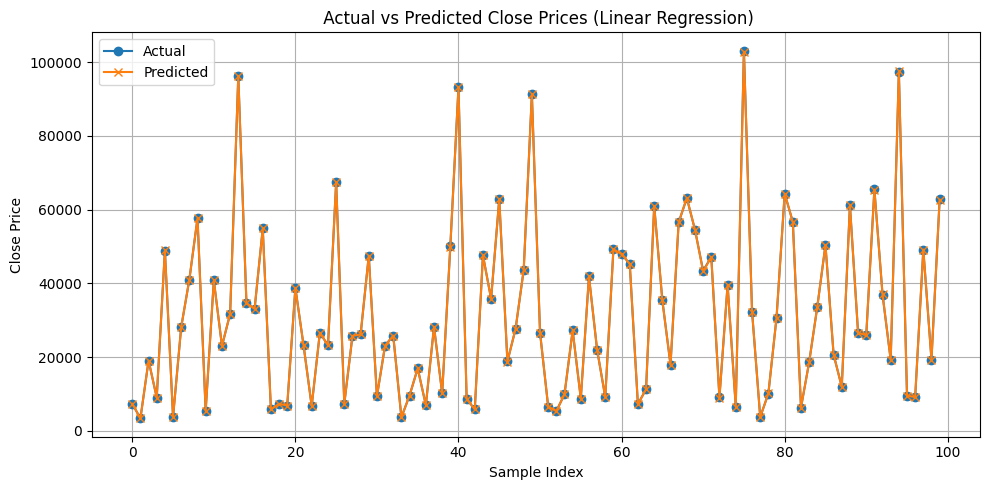

In [11]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(lr_predictions[:100], label='Predicted', marker='x')
plt.title(' Actual vs Predicted Close Prices (Linear Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  Predict on test data
rf_predictions = rf_model.predict(X_test)


In [13]:
#  Evaluation metrics for Random Forest
print(" Evaluation Metrics (Random Forest):")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, rf_predictions))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, rf_predictions))
print("R² Score:", r2_score(y_test, rf_predictions))


 Evaluation Metrics (Random Forest):
Mean Squared Error (MSE): 4042.512113976025
Mean Absolute Error (MAE): 32.77367830978099
R² Score: 0.9999932440273422


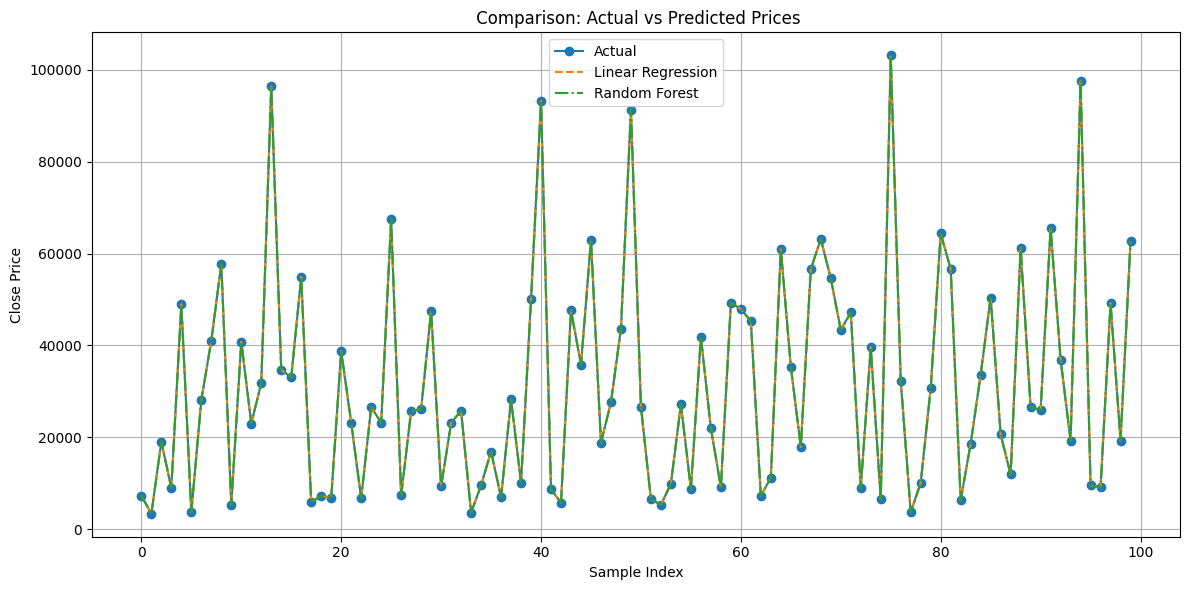

In [14]:
# Visualize actual vs predicted from both models
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(lr_predictions[:100], label='Linear Regression', linestyle='--')
plt.plot(rf_predictions[:100], label='Random Forest', linestyle='-.')
plt.title(" Comparison: Actual vs Predicted Prices")
plt.xlabel("Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import MinMaxScaler

#  Normalize features between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#  Split the normalized data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("Scaled training set shape:", X_train_scaled.shape)


Scaled training set shape: (201252, 4)


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#  Build the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

#  Train the model
model.fit(X_train_scaled, y_train)

#  Predict on the test set
y_pred = model.predict(X_test_scaled)

#  Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model trained using Random Forest!")
print(f" Mean Squared Error: {mse}")
print(f" R2 Score: {r2}")


Model trained using Random Forest!
 Mean Squared Error: 4053.2328987812584
 R2 Score: 0.9999932261104314


In [17]:
#  Predict
nn_predictions = model.predict(X_test_scaled)

#  Evaluation
print(" Evaluation Metrics (Neural Network):")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, nn_predictions))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, nn_predictions))
print("R² Score:", r2_score(y_test, nn_predictions))


 Evaluation Metrics (Neural Network):
Mean Squared Error (MSE): 4053.2328987812584
Mean Absolute Error (MAE): 32.797109840399315
R² Score: 0.9999932261104314


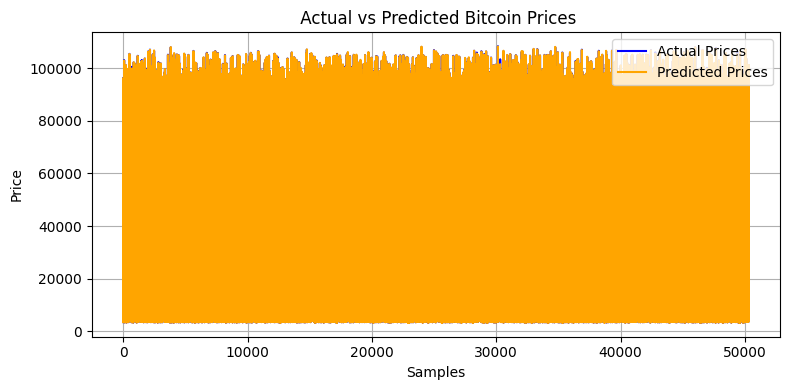

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='orange')
plt.title(' Actual vs Predicted Bitcoin Prices')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



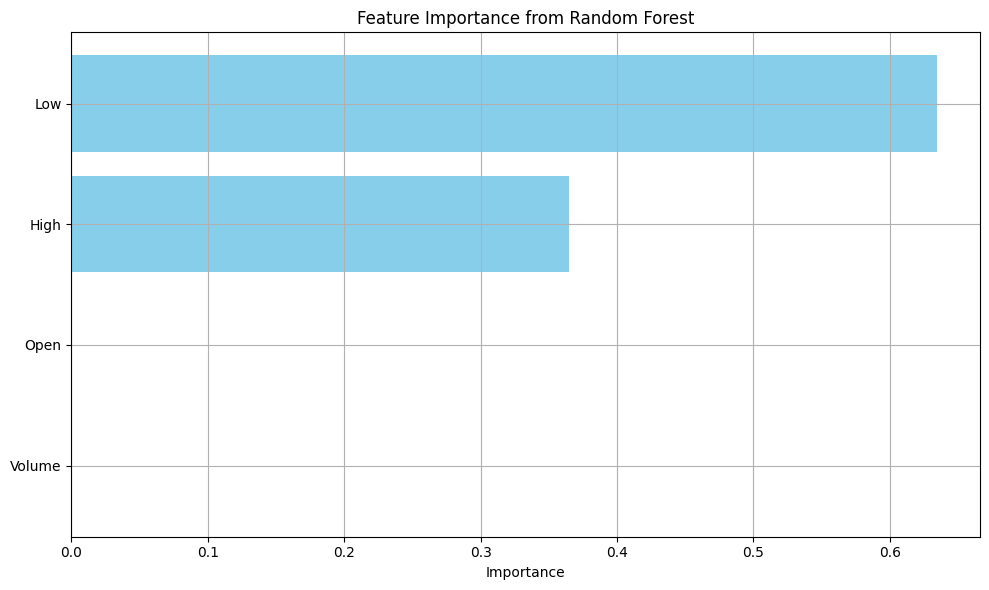

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

#  Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns  # Your original feature names

#  Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#  Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Most important on top
plt.grid(True)
plt.tight_layout()
plt.show()


✅ 1. Model Evaluation
Check how well your model performs using metrics like R² Score, MAE, MSE, or RMSE.

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


C:\Users\HP.IN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Model Evaluation Metrics:
Mean Absolute Error (MAE): 78802.74194906284
Mean Squared Error (MSE): 6808233361.618734
Root Mean Squared Error (RMSE): 82512.01949788124
R² Score: -10.378132493425259


✅ 2. Visualize Predictions vs Actuals

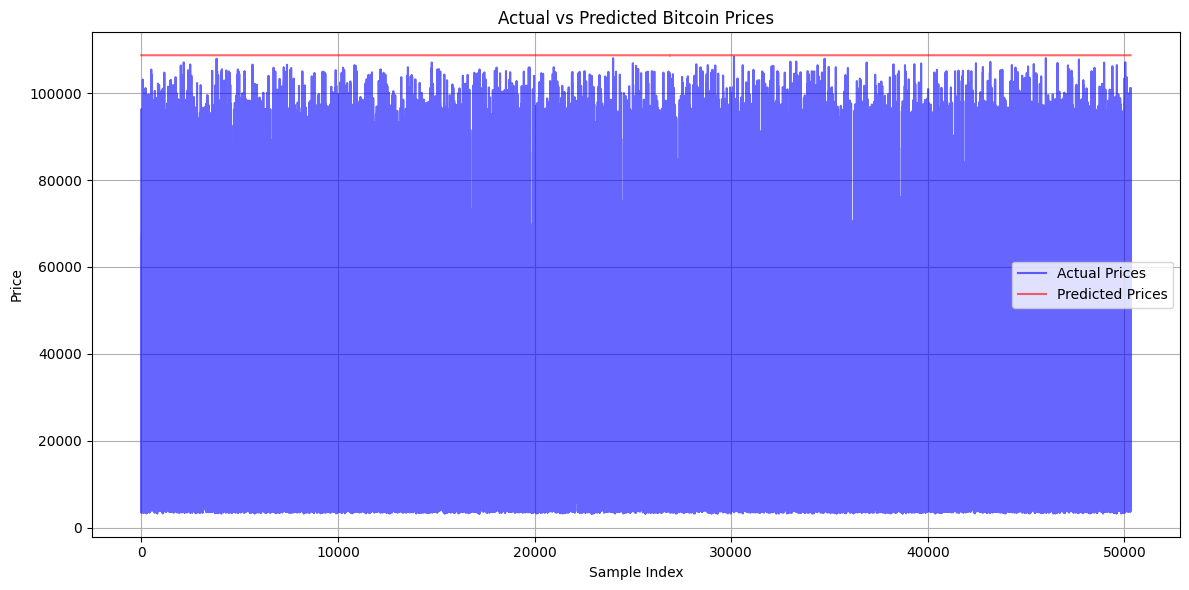

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Prices', color='red', alpha=0.6)
plt.title('Actual vs Predicted Bitcoin Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Save Model for Future Use

In [22]:
import joblib
joblib.dump(model, 'bitcoin_random_forest_model.pkl')
print("Model saved as bitcoin_random_forest_model.pkl")


Model saved as bitcoin_random_forest_model.pkl


In [ ]:
# Create a DataFrame with actual vs predicted values
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Reset index to avoid issues when saving
results_df.reset_index(drop=True, inplace=True)

# Export to CSV
results_df.to_csv('bitcoin_price_predictions.csv', index=False)
print("Predictions exported to 'bitcoin_price_predictions.csv'")


Predictions exported to 'bitcoin_price_predictions.csv'



KeyboardInterrupt

